In [34]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import censusdata
import re



In [35]:
#Define Funtions

#Funcion For NonDigit Removing Characters from Row
def remove_chars(s):
    clean = int(re.sub('[^0-9]+', '', str(s))[-11:])
    return clean

#Function to get census data according to requirements
def getcensustables(table):
    tablename = 'data_' + table
    print(tablename)
    
    # Set requirements to pull from Census API
    
    variablestopull = allvariablescsv.loc[allvariablescsv['Group']==table]['Name'].tolist()
    #print(variablestopull)
    
    #variablestopull = variables['Name'].tolist()

    #variablestopull = variables['Name'].tolist()
    listofcounties = ['121', '089']
    yearstopull = range(2012,2018,1)

    #Pull Census Data according to requirement above
    atlantadata = pd.DataFrame()

    for year in yearstopull:
        for county in listofcounties:

            newdata = censusdata.download('acs5', year, censusdata.censusgeo([('state', '13'), ('county', county), ('tract', '*')]),variablestopull)
            type(newdata)
            newdata['YEAR'] = year
            atlantadata = atlantadata.append(newdata)

    #Rename Column Headings from Code to Text
    for variable in variablestopull:
        #print(variable)
        renamevar1 = allvariablescsv.loc[allvariablescsv['Name']==variable]['Label'].iloc[0]
        renamevar2 = allvariablescsv.loc[allvariablescsv['Name']==variable]['Concept'].iloc[0]
        renamevar = renamevar2 + '_'+ renamevar1
        #print(renamevar)
        atlantadata = atlantadata.rename(columns={variable: renamevar})

    #Transform Index to create GeoID


    #Create GeoID Column
    atlantadata['Name2'] = atlantadata.index
    atlantadata['GEOID'] = atlantadata['Name2'].apply(remove_chars)
    atlantadata.drop(columns=['Name2'], inplace=True)
    
    #Only Keep Atlanta Census Tracts(Geocodes)
    finaldata = atlantageocodes.merge(atlantadata, how='left', on='GEOID')
    
    finaldata = finaldata.dropna(axis=0, how='any')
    
    return finaldata

In [37]:
#Code Begins here

#Tables to Load
tablestoloadcsv = pd.read_csv('data/tablestopull.csv')
tablestoload = tablestoloadcsv['Tables'].tolist()

#Allvariables Table
allvariablescsv = pd.read_csv('data/allvariables.csv')

#Atlanta Geo Codes Table
atlantageocodes = pd.read_csv('data/atlantageocodes.csv')

#Create dictionary with each cleaned table as an entry
alltables = dict()  

for table in tablestoload:
    data = getcensustables(table)
    alltables[table] = data
    
    data.to_csv('data/' + table + '.csv')

data_B19001
data_B25002
data_B25004


Text(0, 0.5, 'Occupancy %')

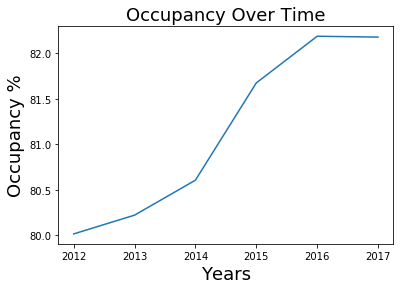

In [38]:
#Example Usage of Occupancy Over Time

occupancytable = alltables['B25002']

occupancytable = occupancytable.groupby('YEAR').sum()
occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#print(occupancytable.head())

occupancytable = occupancytable.reset_index()


plt.plot(occupancytable['YEAR'], occupancytable['Percent_Occupied'])
plt.title("Occupancy Over Time", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Occupancy %", fontsize=18)


In [39]:

incometable = alltables['B19001']

incometable = incometable.groupby('YEAR').sum()
incometable.head()


,GEOID,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!Less than $10,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$25,000 to $29,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$30,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$35,000 to $39,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$40,000 to $44,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$45,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$50,000 to $59,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$60,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$100,000 to $124,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$125,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$150,000 to $199,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$200,000 or more"
YEAR,,,,,,,,,,,,,,,,,,
2012.0,1679136954652,183903.0,24197.0,12026.0,9809.0,9366.0,8474.0,9499.0,7055.0,7052.0,5781.0,12418.0,15333.0,16341.0,12998.0,7417.0,9266.0,16871.0
2013.0,1679136954652,184680.0,24363.0,12271.0,10145.0,9330.0,8126.0,9351.0,6981.0,7062.0,5938.0,12812.0,14315.0,17262.0,12820.0,7707.0,9110.0,17087.0
2014.0,1679136954652,186851.0,24077.0,12015.0,10218.0,9281.0,8616.0,9469.0,7284.0,7678.0,6421.0,12947.0,14239.0,17612.0,12691.0,7585.0,9711.0,17007.0
2015.0,1679136954652,191054.0,23500.0,11774.0,10320.0,9706.0,8528.0,9027.0,7930.0,7842.0,6778.0,13564.0,14810.0,18192.0,13201.0,7576.0,10025.0,18281.0
2016.0,1679136954652,194471.0,22071.0,12097.0,10554.0,9864.0,8722.0,8687.0,8155.0,7542.0,7204.0,13890.0,15354.0,18163.0,14126.0,8005.0,10713.0,19324.0


In [40]:
incometable.columns

Index(['GEOID',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!Less than $10,000',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$10,000 to $14,999',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$15,000 to $19,999',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$20,000 to $24,999',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$25,000 to $29,999',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$30,000 to $34,999',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$35,000 to $39,999',
       'HOUSEHOLD INCOME IN T

In [41]:
incometable_renamed = incometable.rename(columns={'GEOID': 'City of Atlanta', 
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total':'Number of Households Total',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!Less than $10,000': 'Households less than $10K',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$10,000 to $14,999': 'Households $10-14,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$15,000 to $19,999': 'Households $15-19,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$20,000 to $24,999': 'Households $20-24,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$25,000 to $29,999': 'Households $25-29,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$30,000 to $34,999': 'Households $30-34,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$35,000 to $39,999': 'Households $35-39,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$40,000 to $44,999': 'Households $40-44,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$45,000 to $49,999': 'Households $45-49,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$50,000 to $59,999': 'Households $50-59,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$60,000 to $74,999': 'Households $60-74,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$75,000 to $99,999': 'Households $75-99,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$100,000 to $124,999': 'Households $100-124,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$125,000 to $149,999': 'Households $125-149,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$150,000 to $199,999': 'Households $150-199,999',
'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Total!!$200,000 or more': 'Households $200,000 +',})
incometable_renamed.head()

,City of Atlanta,Number of Households Total,Households less than $10K,"Households $10-14,999","Households $15-19,999","Households $20-24,999","Households $25-29,999","Households $30-34,999","Households $35-39,999","Households $40-44,999","Households $45-49,999","Households $50-59,999","Households $60-74,999","Households $75-99,999","Households $100-124,999","Households $125-149,999","Households $150-199,999","Households $200,000 +"
YEAR,,,,,,,,,,,,,,,,,,
2012.0,1679136954652,183903.0,24197.0,12026.0,9809.0,9366.0,8474.0,9499.0,7055.0,7052.0,5781.0,12418.0,15333.0,16341.0,12998.0,7417.0,9266.0,16871.0
2013.0,1679136954652,184680.0,24363.0,12271.0,10145.0,9330.0,8126.0,9351.0,6981.0,7062.0,5938.0,12812.0,14315.0,17262.0,12820.0,7707.0,9110.0,17087.0
2014.0,1679136954652,186851.0,24077.0,12015.0,10218.0,9281.0,8616.0,9469.0,7284.0,7678.0,6421.0,12947.0,14239.0,17612.0,12691.0,7585.0,9711.0,17007.0
2015.0,1679136954652,191054.0,23500.0,11774.0,10320.0,9706.0,8528.0,9027.0,7930.0,7842.0,6778.0,13564.0,14810.0,18192.0,13201.0,7576.0,10025.0,18281.0
2016.0,1679136954652,194471.0,22071.0,12097.0,10554.0,9864.0,8722.0,8687.0,8155.0,7542.0,7204.0,13890.0,15354.0,18163.0,14126.0,8005.0,10713.0,19324.0


In [42]:
incometable_renamed.columns

Index(['City of Atlanta', 'Number of Households Total',
       'Households less than $10K', 'Households $10-14,999',
       'Households $15-19,999', 'Households $20-24,999',
       'Households $25-29,999', 'Households $30-34,999',
       'Households $35-39,999', 'Households $40-44,999',
       'Households $45-49,999', 'Households $50-59,999',
       'Households $60-74,999', 'Households $75-99,999',
       'Households $100-124,999', 'Households $125-149,999',
       'Households $150-199,999', 'Households $200,000 +'],
      dtype='object')

In [43]:
incometable_nogeo= incometable_renamed[['Number of Households Total',
       'Households less than $10K', 'Households $10-14,999',
       'Households $15-19,999', 'Households $20-24,999',
       'Households $25-29,999', 'Households $30-34,999',
       'Households $35-39,999', 'Households $40-44,999',
       'Households $45-49,999', 'Households $50-59,999',
       'Households $60-74,999', 'Households $75-99,999',
       'Households $100-124,999', 'Households $125-149,999',
       'Households $150-199,999', 'Households $200,000 +']]
#incometable_nogeo.head()
incometable_nogeo.columns

Index(['Number of Households Total', 'Households less than $10K',
       'Households $10-14,999', 'Households $15-19,999',
       'Households $20-24,999', 'Households $25-29,999',
       'Households $30-34,999', 'Households $35-39,999',
       'Households $40-44,999', 'Households $45-49,999',
       'Households $50-59,999', 'Households $60-74,999',
       'Households $75-99,999', 'Households $100-124,999',
       'Households $125-149,999', 'Households $150-199,999',
       'Households $200,000 +'],
      dtype='object')

In [51]:
incometable_nogeo['Percent_Household less than $10K'] = (incometable_nogeo['Households less than $10K'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $10 - 14,999'] = (incometable_nogeo['Households $10-14,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $15 - 19,999'] = (incometable_nogeo['Households $15-19,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $20 - 24,999'] = (incometable_nogeo['Households $20-24,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $25 - 29,999'] = (incometable_nogeo['Households $25-29,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $30 - 34,999'] = (incometable_nogeo['Households $30-34,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $35 - 39,999'] = (incometable_nogeo['Households $35-39,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $40 - 44,999'] = (incometable_nogeo['Households $40-44,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $45 - 49,999'] = (incometable_nogeo['Households $45-49,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $50 - 59,999'] = (incometable_nogeo['Households $50-59,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $60 - 74,999'] = (incometable_nogeo['Households $60-74,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $75 - 99,999'] = (incometable_nogeo['Households $75-99,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $100 - 124,999'] = (incometable_nogeo['Households $100-124,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $125 - 149,999'] = (incometable_nogeo['Households $125-149,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $150 - 199,999'] = (incometable_nogeo['Households $150-199,999'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo['Percent_Household $200,000 or more'] = (incometable_nogeo['Households $200,000 +'] / incometable_nogeo['Number of Households Total'])*100 
incometable_nogeo.head()
#occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#print(occupancytable.head())

#occupancytable = occupancytable.reset_index()



#plt.plot(occupancytable['YEAR'], occupancytable['Percent_Occupied'])
#plt.title("% of Households by Income Bracket Over Time", fontsize=18)
#plt.xlabel("Years", fontsize=18)
#plt.ylabel("Household by Income %", fontsize=18)

,Number of Households Total,Households less than $10K,"Households $10-14,999","Households $15-19,999","Households $20-24,999","Households $25-29,999","Households $30-34,999","Households $35-39,999","Households $40-44,999","Households $45-49,999",...,"Percent_Household $35 - 39,999","Percent_Household $40 - 44,999","Percent_Household $45 - 49,999","Percent_Household $50 - 59,999","Percent_Household $60 - 74,999","Percent_Household $75 - 99,999","Percent_Household $100 - 124,999","Percent_Household $125 - 149,999","Percent_Household $150 - 199,999","Percent_Household $200,000 or more"
YEAR,,,,,,,,,,,,,,,,,,,,,
2012.0,183903.0,24197.0,12026.0,9809.0,9366.0,8474.0,9499.0,7055.0,7052.0,5781.0,...,3.836262,3.834630,3.143505,6.752473,8.337548,8.885663,7.067856,4.033104,5.038526,9.173858
2013.0,184680.0,24363.0,12271.0,10145.0,9330.0,8126.0,9351.0,6981.0,7062.0,5938.0,...,3.780052,3.823912,3.215291,6.937405,7.751245,9.346979,6.941737,4.173164,4.932857,9.252220
2014.0,186851.0,24077.0,12015.0,10218.0,9281.0,8616.0,9469.0,7284.0,7678.0,6421.0,...,3.898293,4.109156,3.436428,6.929050,7.620510,9.425692,6.792043,4.059384,5.197189,9.101905
2015.0,191054.0,23500.0,11774.0,10320.0,9706.0,8528.0,9027.0,7930.0,7842.0,6778.0,...,4.150659,4.104599,3.547688,7.099563,7.751735,9.521915,6.909565,3.965371,5.247208,9.568499
2016.0,194471.0,22071.0,12097.0,10554.0,9864.0,8722.0,8687.0,8155.0,7542.0,7204.0,...,4.193427,3.878213,3.704408,7.142453,7.895265,9.339696,7.263808,4.116295,5.508791,9.936700


In [52]:
income_per = incometable_nogeo[['Percent_Household less than $10K',
       'Percent_Household $10 - 14,999', 'Percent_Household $15 - 19,999',
       'Percent_Household $20 - 24,999', 'Percent_Household $25 - 29,999',
       'Percent_Household $30 - 34,999', 'Percent_Household $35 - 39,999',
       'Percent_Household $40 - 44,999', 'Percent_Household $45 - 49,999',
       'Percent_Household $50 - 59,999', 'Percent_Household $60 - 74,999',
       'Percent_Household $75 - 99,999', 'Percent_Household $100 - 124,999',
       'Percent_Household $125 - 149,999', 'Percent_Household $150 - 199,999',
       'Percent_Household $200,000 or more']]
income_per.head()

,Percent_Household less than $10K,"Percent_Household $10 - 14,999","Percent_Household $15 - 19,999","Percent_Household $20 - 24,999","Percent_Household $25 - 29,999","Percent_Household $30 - 34,999","Percent_Household $35 - 39,999","Percent_Household $40 - 44,999","Percent_Household $45 - 49,999","Percent_Household $50 - 59,999","Percent_Household $60 - 74,999","Percent_Household $75 - 99,999","Percent_Household $100 - 124,999","Percent_Household $125 - 149,999","Percent_Household $150 - 199,999","Percent_Household $200,000 or more"
YEAR,,,,,,,,,,,,,,,,
2012.0,13.157480,6.539317,5.333790,5.092902,4.607864,5.165223,3.836262,3.834630,3.143505,6.752473,8.337548,8.885663,7.067856,4.033104,5.038526,9.173858
2013.0,13.192008,6.644466,5.493286,5.051982,4.400043,5.063353,3.780052,3.823912,3.215291,6.937405,7.751245,9.346979,6.941737,4.173164,4.932857,9.252220
2014.0,12.885668,6.430257,5.468528,4.967059,4.611161,5.067674,3.898293,4.109156,3.436428,6.929050,7.620510,9.425692,6.792043,4.059384,5.197189,9.101905
2015.0,12.300187,6.162656,5.401614,5.080239,4.463659,4.724842,4.150659,4.104599,3.547688,7.099563,7.751735,9.521915,6.909565,3.965371,5.247208,9.568499
2016.0,11.349250,6.220465,5.427030,5.072222,4.484987,4.466990,4.193427,3.878213,3.704408,7.142453,7.895265,9.339696,7.263808,4.116295,5.508791,9.936700


In [53]:
x_axis = np.arange(len(income_per))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,20))
plt.bar(x_axis, income_per['YEAR'], color = red, alpha=0.5, align="edge")
plt.yticks(tick_locations, income_per['YEAR'], rotation = "vertical")
income_per = income_per.reset_index()

#plt.plot(['YEAR'], occupancytable['Percent_Occupied'])
plt.title("% of Households by Income Bracket Over Time", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Household by Income %", fontsize=18)
plt.show()

KeyError: 'YEAR'

<Figure size 1440x1440 with 0 Axes>